# MobileNet on ChaLearn Optical Flow

In [1]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context = "talk")

from IPython.display import Image, HTML, display

In [2]:
def acc_loss_show(sLogFile, sDescription, nEpoch = 250, colors=None):
    ylim_loss = (0.0,5.0)
    
    print(sDescription)
    
    dfLog = pd.read_csv(sLogFile)
    print("Validation set: max accuracy %.2f | min loss %.3f" % (dfLog.val_acc.max(), dfLog.val_loss.min()))
    #print("\n", dfLog.tail())
    
    if nEpoch == 0: nEpoch = len(dfLog)
    if colors == None: colors = ["b", "g"]
    
    # acc left side
    plt.subplots(figsize=(12,4))
    
    plt.subplot(1, 2, 1) # 1 row x 2 columns, now first subplot 
    plt.plot(dfLog.epoch, dfLog.acc, colors[0], label="Training accuracy")
    plt.plot(dfLog.epoch, dfLog.val_acc, colors[1], label="Validation accuracy")

    plt.xlim((0,nEpoch))
    plt.ylim((0,1))
    plt.legend()
    
    # loss right side
    plt.subplot(1, 2, 2)
    plt.plot(dfLog.epoch, dfLog.loss, colors[0], label="Training loss")
    plt.plot(dfLog.epoch, dfLog.val_loss, colors[1], label="Validation loss")

    plt.xlim((0,nEpoch))
    plt.ylim(ylim_loss)
    plt.legend()
    
    plt.show()
    
    return

ChaLearn020 optical flow on mobilenet-lstm, lr=1e-3
Validation set: max accuracy 0.39 | min loss 2.157


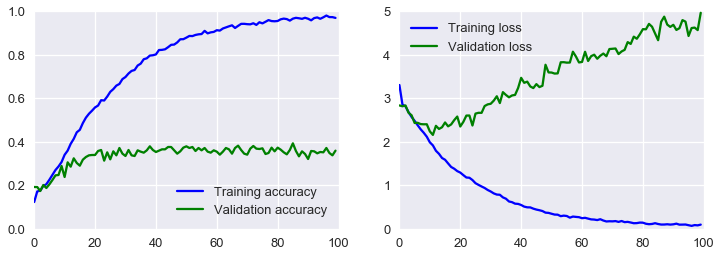

In [5]:
acc_loss_show("../log/20180618-1143-chalearn020-oflow-lstm-acc.csv",
    "ChaLearn020 optical flow on mobilenet-lstm, lr=1e-3", 100)

ChaLearn249 optical flow on mobilenet-lstm, lr=1e-3 => significant better then pure images!
Validation set: max accuracy 0.28 | min loss 3.244


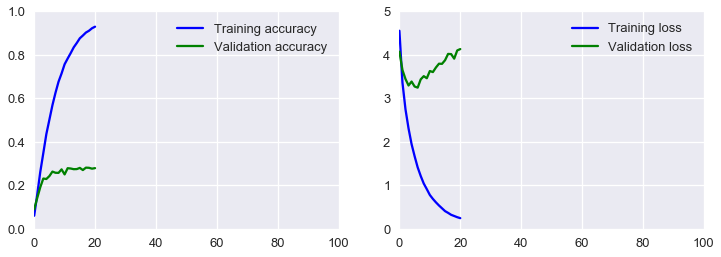

In [10]:
acc_loss_show("../log/20180618-1210-chalearn249-oflow-lstm-acc.csv",
    "ChaLearn249 optical flow on mobilenet-lstm, lr=1e-3 => significant better then pure images!", 100)

### Combined model

```
Predict with combined rgb + flow LSTM models.
Current directory: /home/ubuntu/sign-language

Predict features on LSTM ...
Load 5784 samples from data-temp/04-chalearn/249-frame-20-mobilenet/val ...
Loaded 5784 samples from 249 classes
Init RNN lstm with 20 number of frames, 1024 feature length, 249 classes
Load neural network lstm from model/20180608-2306-lstm-35878in249-best.h5 ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
lstm_1 (LSTM)                (None, 20, 1024)          8392704
_________________________________________________________________
lstm_2 (LSTM)                (None, 1024)              8392704
_________________________________________________________________
dense_1 (Dense)              (None, 249)               255225
=================================================================
Total params: 17,040,633
Trainable params: 17,040,633
Non-trainable params: 0
_________________________________________________________________
5784/5784 [==============================] - 11s 2ms/step
RGB model accuracy: 9.85%

Predict features on LSTM ...
Load 5784 samples from data-temp/04-chalearn/249-oflow-20-mobilenet/val ...
Loaded 5784 samples from 249 classes
Init RNN lstm with 20 number of frames, 1024 feature length, 249 classes
Load neural network lstm from model/20180618-1210-chalearn249-oflow-lstm-best.h5 ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
lstm_1 (LSTM)                (None, 20, 1024)          8392704
_________________________________________________________________
lstm_2 (LSTM)                (None, 1024)              8392704
_________________________________________________________________
dense_1 (Dense)              (None, 249)               255225
=================================================================
Total params: 17,040,633
Trainable params: 17,040,633
Non-trainable params: 0
_________________________________________________________________
5784/5784 [==============================] - 11s 2ms/step
Flow model accuracy: 25.14%

Combined RGB + flow model accuracy: 18.07%
```

Flow model seems better, but why is combined prediction worse? :(